In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import crop

In [5]:
def fc(PFD, T_air, CO2, RH, wind, P_air, leaf_n_content, leaf_width, WP_leaf, ET_supply):
    cg = crop.CGas_exchange('test', leaf_n_content)
    cg.SetVal_psil(PFD, T_air, CO2, RH, wind, P_air, leaf_width, WP_leaf, ET_supply)
    return cg

In [99]:
#leaf_n_content = 10
#leaf_n_content = 0.25263296562882886
leaf_n_content = 0.10

In [100]:
cg = crop.CGas_exchange('test', leaf_n_content)

In [7]:
PFD = 1000
T_air = 30
CO2 = 380
RH = 50
wind = 1
P_air = 100
leafwidth = 5
WP_leaf = -0.1
ET_supply = 0

In [101]:
PFD = 610.70374202567325
T_air = 26.965076446533203
CO2 = 400
RH = 76.875008272209897
wind = 0.83333333333333337
P_air = 100
leafwidth = 5
WP_leaf = -0.05000000074505806
ET_supply = 0.59932198790500946 * 10 / 3600 / 18.01 / 0.27746641319459969

In [44]:
0.59932198790500946 * 10 / 3600 / 18.01 / 0.27746641319459969

0.0003331452133661672

In [102]:
cg.SetVal_psil(PFD, T_air, CO2, RH, wind, P_air, leafwidth, WP_leaf, ET_supply)

In [103]:
cg.A_net

-2.7203742399100075

In [104]:
cg.gs

0.04

In [10]:
def co2(x):
    cg.SetVal_psil(PFD, T_air, x, RH, wind, P_air, leafwidth, WP_leaf, ET_supply)
    return cg.A_net

def co2_gs(x):
    cg.SetVal_psil(PFD, T_air, x, RH, wind, P_air, leafwidth, WP_leaf, ET_supply)
    return cg.gs

def temp(x):
    cg.SetVal_psil(PFD, x, CO2, RH, wind, P_air, leafwidth, WP_leaf, ET_supply)
    return cg.A_net

def pfd(x):
    cg.SetVal_psil(x, T_air, CO2, RH, wind, P_air, leafwidth, WP_leaf, ET_supply)
    return cg.A_net

In [11]:
X_CO2 = np.arange(0, 800, 10)
X_temp = np.arange(-20, 50, 1)
X_PFD = np.arange(0, 2000, 100)

In [12]:
Y_CO2 = [co2(float(x)) for x in X_CO2]
gs_CO2 = [co2_gs(float(x)) for x in X_CO2]
Y_temp = [temp(float(x)) for x in X_temp]
Y_PFD = [pfd(float(x)) for x in X_PFD]

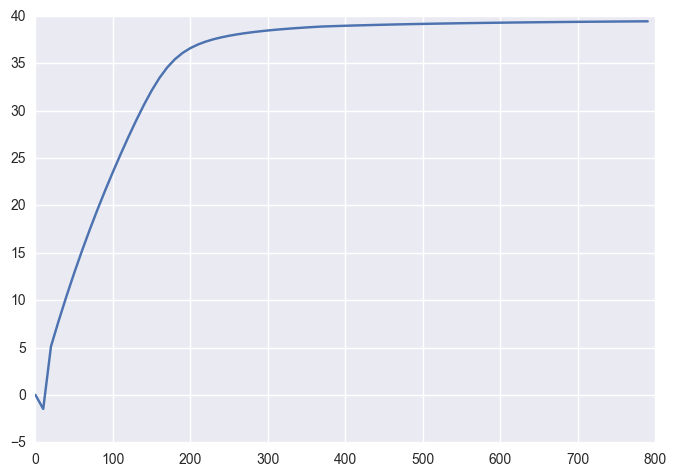

In [13]:
plt.plot(X_CO2, Y_CO2)

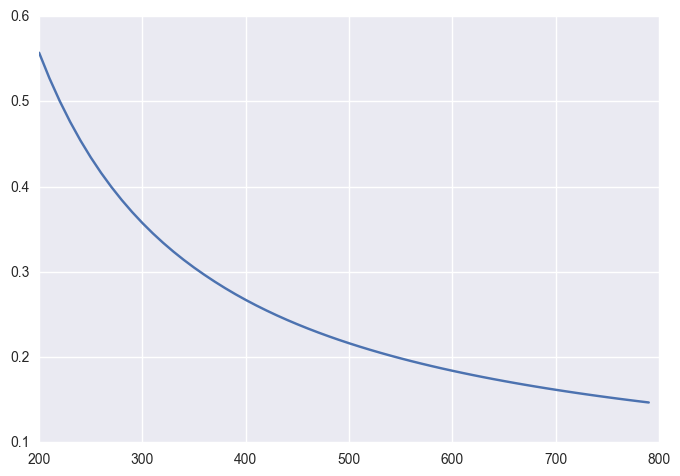

In [14]:
plt.plot(X_CO2[20:], gs_CO2[20:])

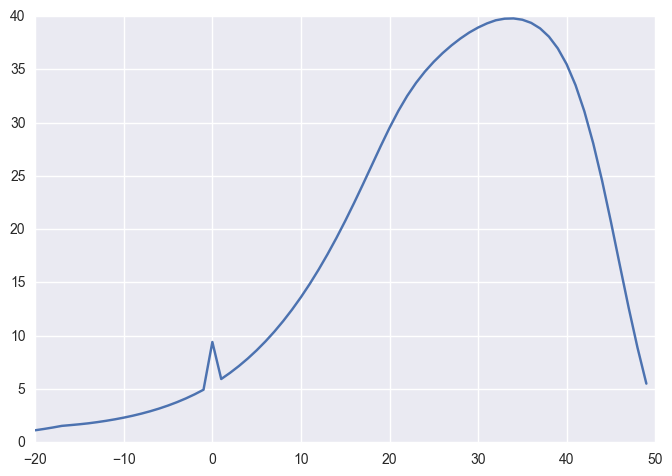

In [15]:
plt.plot(X_temp, Y_temp)

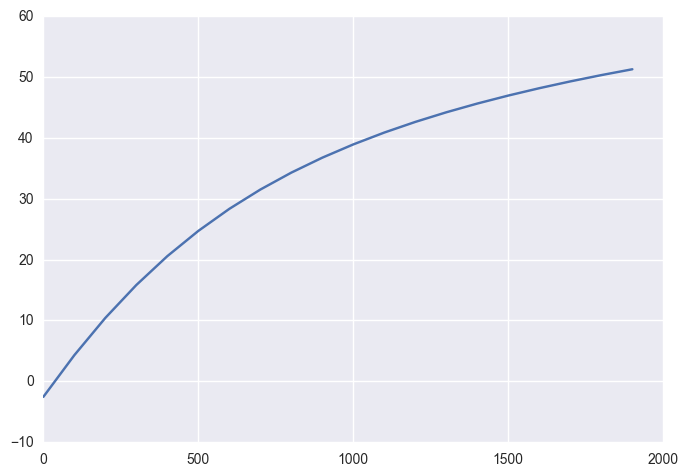

In [16]:
plt.plot(X_PFD, Y_PFD)

In [54]:
from maizsim.physiology import photosynthesis as ps
from maizsim.atmosphere import Weather
from maizsim.rhizosphere import Soil

In [68]:
ge = ps.GasExchange('test')
#leaf_n_content = 10
leaf_n_content = 0.25263296562882886

In [56]:
weather = Weather()
soil = Soil()

In [20]:
def w():
    weather = Weather()
    weather.PFD = 1000
    weather.T_air = 30
    weather.CO2 = 380
    weather.RH = 50 / 100
    weather.wind = 1
    weather.P_air = 100
    return weather
weather = w()
leafwidth = 5
soil.WP_leaf = -0.1
ET_supply = 0

In [69]:
def w():
    weather = Weather()
    weather.PFD = 610.70374202567325
    weather.T_air = 26.965076446533203
    weather.CO2 = 400
    weather.RH = 76.875008272209897 / 100
    weather.wind = 0.83333333333333337
    weather.P_air = 100
    return weather
weather = w()
leafwidth = 5
soil.WP_leaf = -0.05000000074505806
ET_supply = 0.59932198790500946 * 10 / 3600 / 18.01 / 0.27746641319459969

In [70]:
ge.setup(weather, soil, leaf_n_content, leafwidth, ET_supply)

       gb = 1.9803114233204164, gs = 0.04
A_net0 = 0.0
       gb = 1.9803114233204164, gs = 0.04
I2 = 220.61672680677444, Cm0 = 400.0, T_leaf = 26.965076446533203
   Ac = -2.0006506078674535, Aj = -1.9754590642727932, A_net = -2.2093484390466913
A_net0 = 1.4901161193847656e-08
       gb = 1.9803114233204164, gs = 0.04000000011440515
I2 = 220.61672680677444, Cm0 = 399.99999939364477, T_leaf = 26.965076446533203
   Ac = -2.0006506078674535, Aj = -1.9754590642727932, A_net = -2.2093484390466913
A_net0 = 0.0
       gb = 1.9803114233204164, gs = 0.04
I2 = 220.61672680677444, Cm0 = 400.0, T_leaf = 26.965076446533203
   Ac = -2.0006506078674535, Aj = -1.9754590642727932, A_net = -2.2093484390466913
A_net0 = -1.01
       gb = 1.9803114233204164, gs = 0.04
I2 = 220.61672680677444, Cm0 = 441.0987284846744, T_leaf = 26.965076446533203
   Ac = -2.0006506078674535, Aj = -1.9754590642727932, A_net = -2.2093484390466913
A_net0 = -1.01
       gb = 1.9803114233204164, gs = 0.04
I2 = 220.61672680677444,

In [71]:
ge.leaf.stomata.gs

0.04

In [ ]:
def ge_CO2(x):
    weather = w()
    weather.CO2 = x
    ge.setup(weather, soil, leaf_n_content, leafwidth, ET_supply)
    return ge.A_net

def ge_CO2_gs(x):
    weather = w()
    weather.CO2 = x
    ge.setup(weather, soil, leaf_n_content, leafwidth, ET_supply)
    return ge.gs

def ge_temp(x):
    weather = w()
    weather.T_air = x
    ge.setup(weather, soil, leaf_n_content, leafwidth, ET_supply)
    return ge.A_net

def ge_PFD(x):
    weather = w()
    weather.PFD = x
    ge.setup(weather, soil, leaf_n_content, leafwidth, ET_supply)
    return ge.A_net

In [ ]:
Y2_CO2 = [ge_CO2(x) for x in X_CO2]
gs2_CO2 = [ge_CO2_gs(x) for x in X_CO2]
Y2_temp = [ge_temp(x) for x in X_temp]
Y2_PFD = [ge_PFD(x) for x in X_PFD]

In [ ]:
plt.plot(X_CO2, Y2_CO2)

In [ ]:
gs_CO2[70:]

In [ ]:
gs2_CO2[70:]

In [ ]:
plt.plot(X_CO2[20:], gs2_CO2[20:])

In [ ]:
plt.plot(X_temp, Y2_temp)

In [ ]:
plt.plot(X_PFD, Y2_PFD)